## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri



| Feature Name            | Type    | Description                                           |
|-------------------------|---------|-------------------------------------------------------|
| Contenido_de_Nitrogeno  | Int64   | Proportion of nitrogen content in the soil.           |
| Contenido_de_Fosforo    | Int64   | Proportion of phosphorus content in the soil.         |
| Contenido_de_Potasio    | Int64   | Proportion of potassium content in the soil.          |
| Temperatura_C           | Float64 | Temperature in degrees Celsius.                       |
| Humedad_Relativa        | Float64 | Relative humidity in percentage.                      |
| Nivel_de_pH             | Float64 | Soil pH level.                                        |
| Precipitacion_mm        | Float64 | Precipitation amount in millimeters.                  |
| Tipo_de_Cultivo         | Object  | Recommended crop type based on the above parameters.  |



The use of Machine Learning in agriculture is vital for optimizing yields, improving sustainability, and minimizing risks. This is particularly relevant in Argentina, where agriculture is an economic pillar. Knowing which type of crop is most suitable for specific soil and climate conditions can have a significant impact on productivity and sustainability.


My work will be divided into 2 parts:

## A. Exploratory Data Analysis (EDA)

In ordert to realize an exhaustive EDA of the dataset, I will consider the following questions:
- How are the values distributed in each of the variables?
- Are there correlations between the different soil variables and crop types?
- How does the crop recommendation vary according to soil and climate conditions?
- Are there outliers or missing values that need to be treated?

## B. Machine Learning

In this section, I will implement two Machine Learning models to predict the Crop Type based on soil and climate variables. I will use a Logistic Regression and a Decision Tree.

I will also interpret what the diagonal and the deviations from the diagonal mean. and mention Which crop is most confused by the algorithm.


___

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [19]:
df_crops= pd.read_csv("tipo_cultivo.csv")
df_crops.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
df_crops = df_crops.copy()

In [21]:
df_crops.columns

Index(['Unnamed: 0', 'Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

## A. Exploratory Data Analysis (EDA)

### Data validation

I proceed to remove spaces from the columns.

In [22]:
df_crops.rename(columns=lambda x: x.strip(), inplace=True)

### Read dataset and dimension

In [23]:
print("The dataset has " + str(df_crops.shape[0])+ " rows.")
print("The dataset has " + str(df_crops.shape[1])+ " columns.")

The dataset has 2200 rows.
The dataset has 9 columns.


In [24]:
df_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Contenido_de_Nitrogeno  2200 non-null   int64  
 2   Contenido_de_Fosforo    2200 non-null   int64  
 3   Contenido_de_Potasio    2200 non-null   int64  
 4   Temperatura_C           2200 non-null   float64
 5   Humedad_Relativa        2200 non-null   float64
 6   Nivel_de_pH             2200 non-null   float64
 7   Precipitacion_mm        2200 non-null   float64
 8   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [25]:
from exploratory_data_analysis import validate_columns 
validate_columns(df_crops)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Unnamed: 0,NaN,2200.0,0,0.0,"[543, 934, 472, 1810, 54]"
Contenido_de_Nitrogeno,NaN,2200.0,0,0.0,"[37, 8, 5, 16, 95]"
Contenido_de_Fosforo,NaN,2200.0,0,0.0,"[57, 25, 68, 18, 52]"
Contenido_de_Potasio,NaN,2200.0,0,0.0,"[20, 36, 20, 26, 36]"
Temperatura_C,NaN,2200.0,0,0.0,"[31.1006247, 19.91330523, 18.72987676, 28.4364..."
Humedad_Relativa,NaN,2200.0,0,0.0,"[44.82069159, 94.95031368, 61.33186249, 91.813..."
Nivel_de_pH,NaN,2200.0,0,0.0,"[7.354286985, 6.828522375, 5.001038726, 5.5683..."
Precipitacion_mm,NaN,2200.0,0,0.0,"[70.79934452, 104.0277061, 139.8710041, 145.54..."
Tipo_de_Cultivo,22,2200,0,0.0,"[mothbeans, pomegranate, pigeonpeas, coconut, ..."


In [26]:
df_crops.describe()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,635.229617,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,549.750000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1099.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,1649.250000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,2199.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Outliers treatment

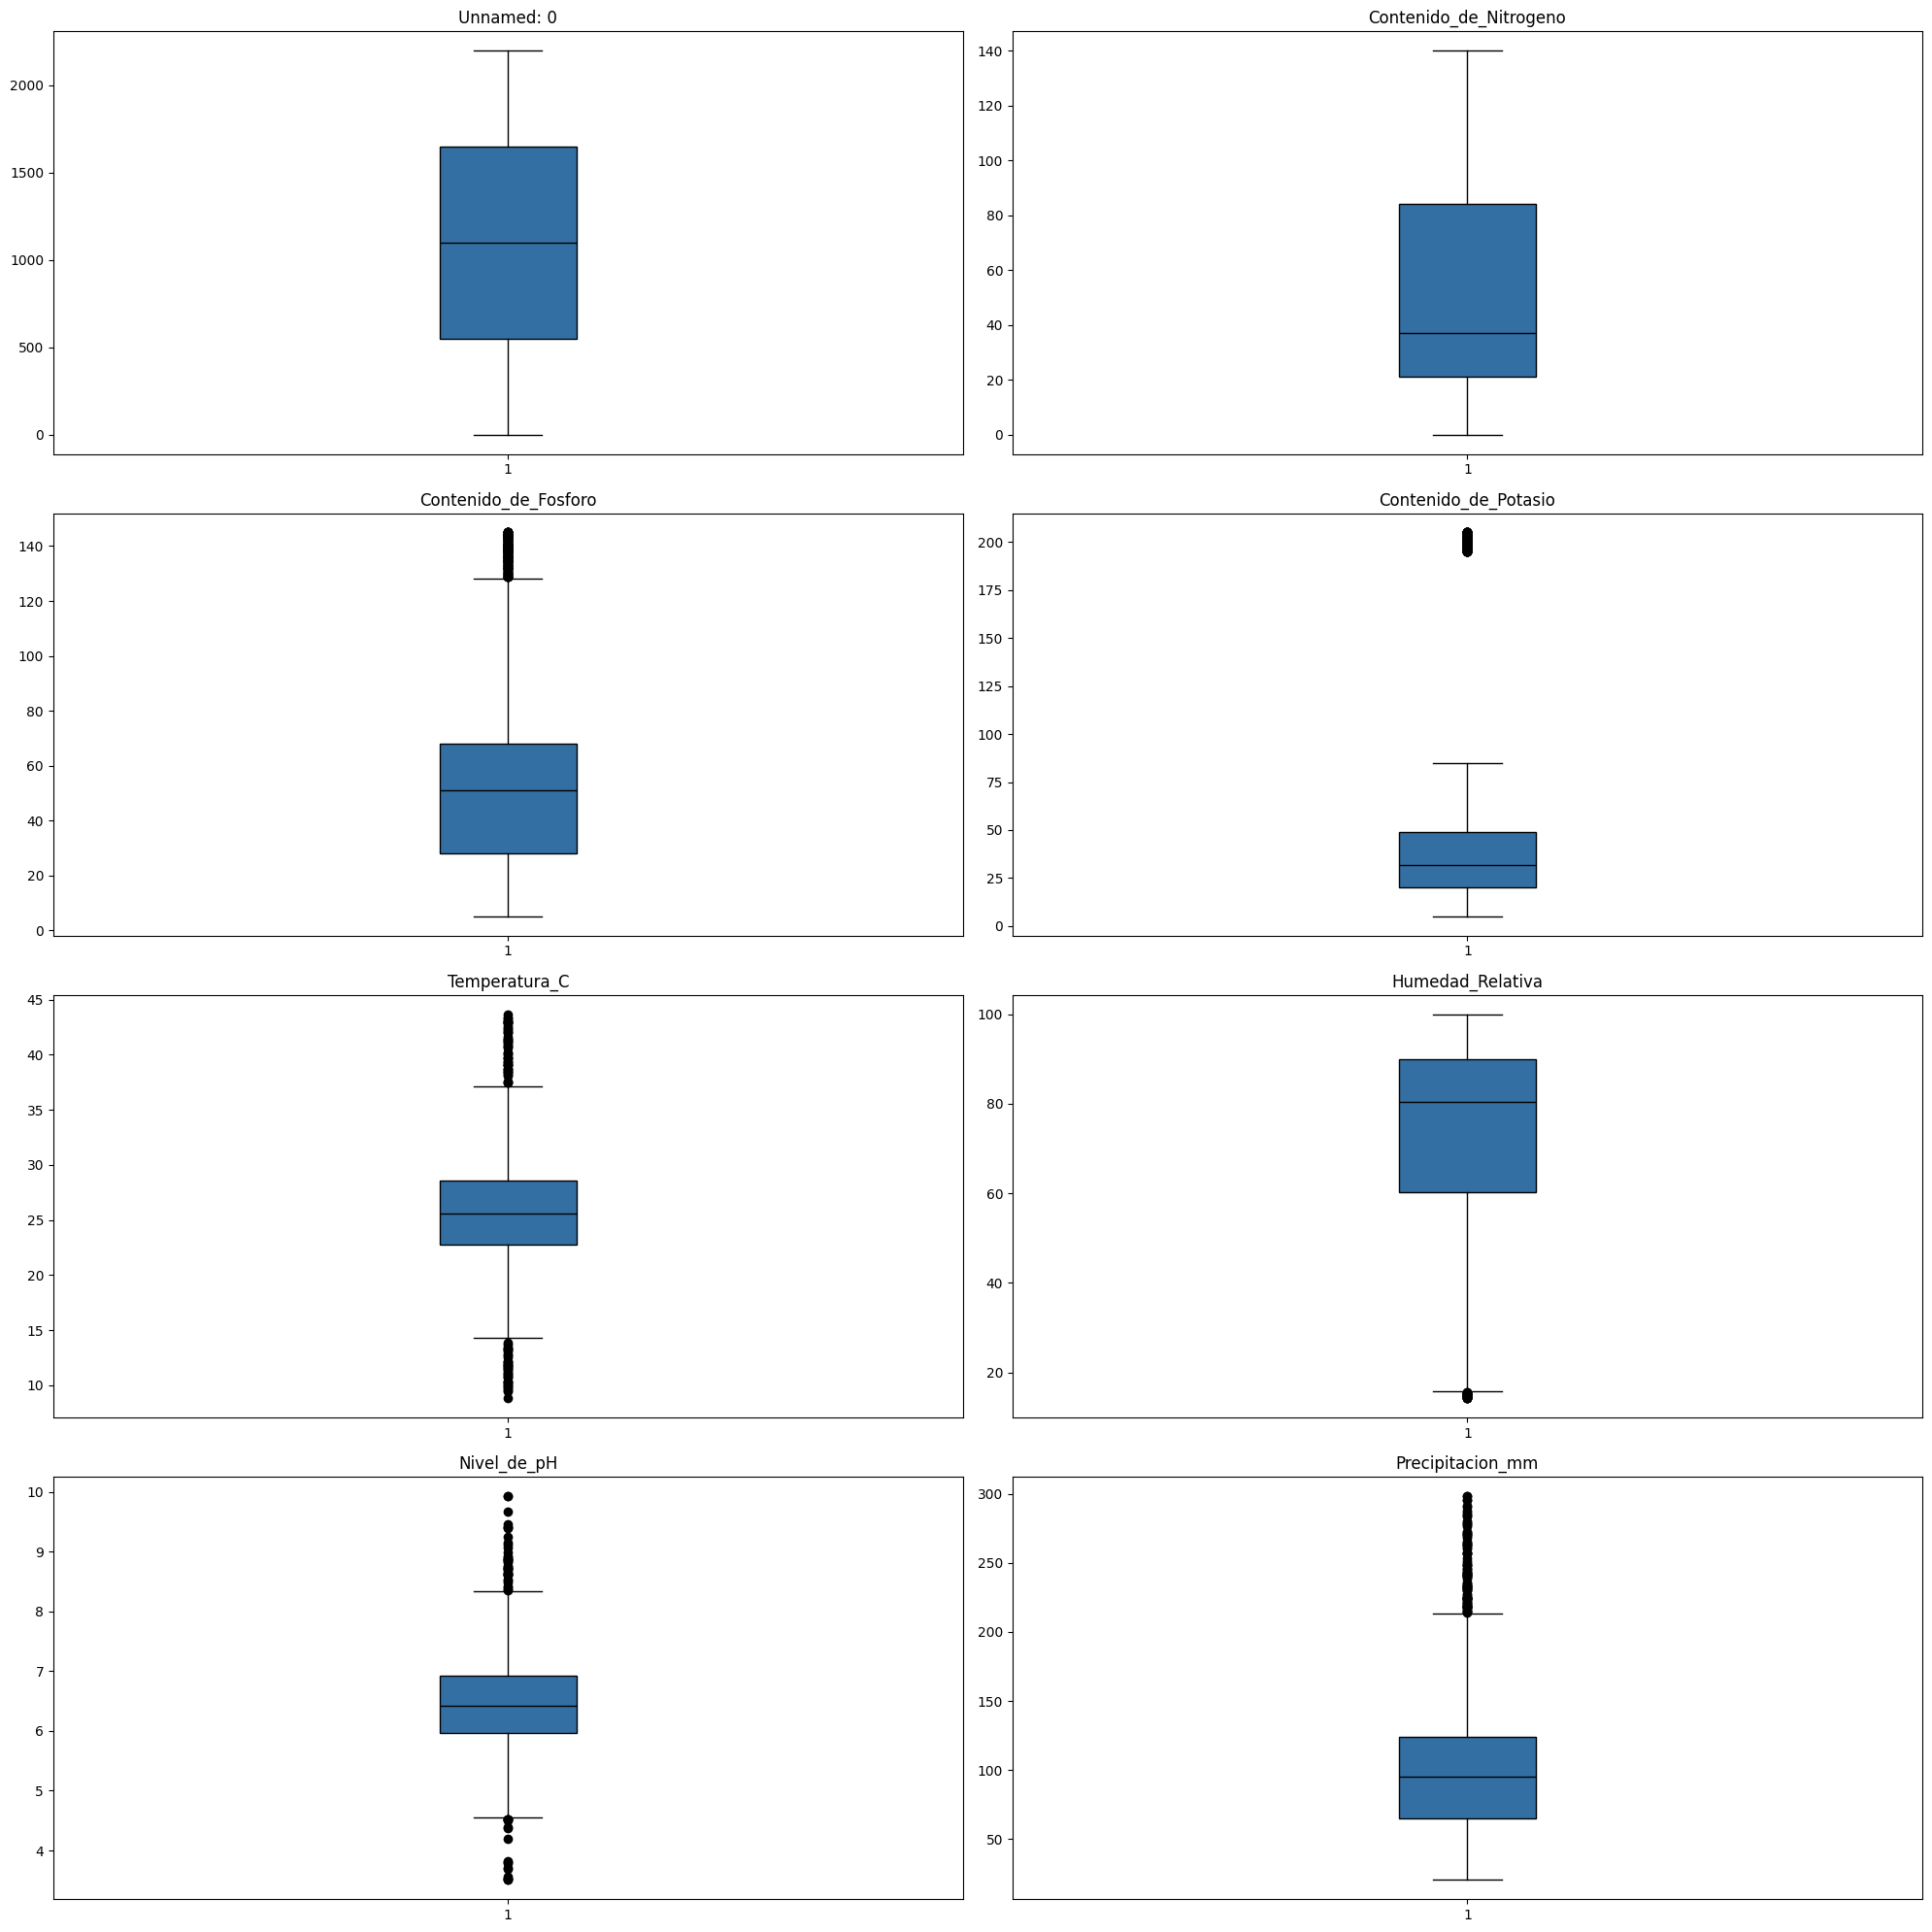

In [27]:
from exploratory_data_analysis import plot_outliers
plot_outliers(df_crops)

We can conclude that, in this case, it is not necessary to perform a specific treatment of outliers in the crop dataset, since the extreme values can be explained by the natural variations in the soil and climate conditions. In addition, the variables can change over time and based on the crop being grown.

In [28]:
df_crops.groupby("Tipo_de_Cultivo").agg({
    "Contenido_de_Fosforo": "mean",
    "Contenido_de_Potasio": "mean",
    "Temperatura_C": "mean"
}).sort_values(by="Contenido_de_Fosforo", ascending=False).reset_index()

,Tipo_de_Cultivo,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C
0,apple,134.22,199.89,22.630942
1,grapes,132.53,200.11,23.849575
2,banana,82.01,50.05,27.376798
3,lentil,68.36,19.41,24.509052
4,chickpea,67.79,79.92,18.872847
5,pigeonpeas,67.73,20.29,27.741762
6,kidneybeans,67.54,20.05,20.115085
7,blackgram,67.47,19.24,29.973340
8,papaya,59.05,50.04,33.723859
9,maize,48.44,19.79,22.389204


### Correlations between soil variables and crop types

In order to understand the relationships between the different variables, OneHotEncoder is used to transform the categorical variables into numerical ones.

In [29]:
from sklearn.preprocessing import OneHotEncoder
df_cultivos_ohe = OneHotEncoder(sparse=False)
df_cultivos_ohe.fit(df_crops[['Tipo_de_Cultivo']])
df_cultivos_ohe.categories_

[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [30]:
df_crops["apple"], df_crops["banana"], df_crops["blackgram"], df_crops["chickpea"], df_crops["coconut"], df_crops["coffee"], df_crops["cotton"], df_crops["grapes"], df_crops["jute"], df_crops["kidneybeans"], df_crops["lentil"], df_crops["maize"], df_crops["mango"], df_crops["mothbeans"], df_crops["mungbean"], df_crops["muskmelon"], df_crops["orange"], df_crops["papaya"], df_crops["pigeonpeas"], df_crops["pomegranate"], df_crops["rice"], df_crops["watermelon"] = df_cultivos_ohe.transform(df_crops[['Tipo_de_Cultivo']]).T

df_crops.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df_crops.drop(columns=["Tipo_de_Cultivo"], inplace=True)
df_crops.drop(columns=["Unnamed: 0"], inplace=True)

### Correlations

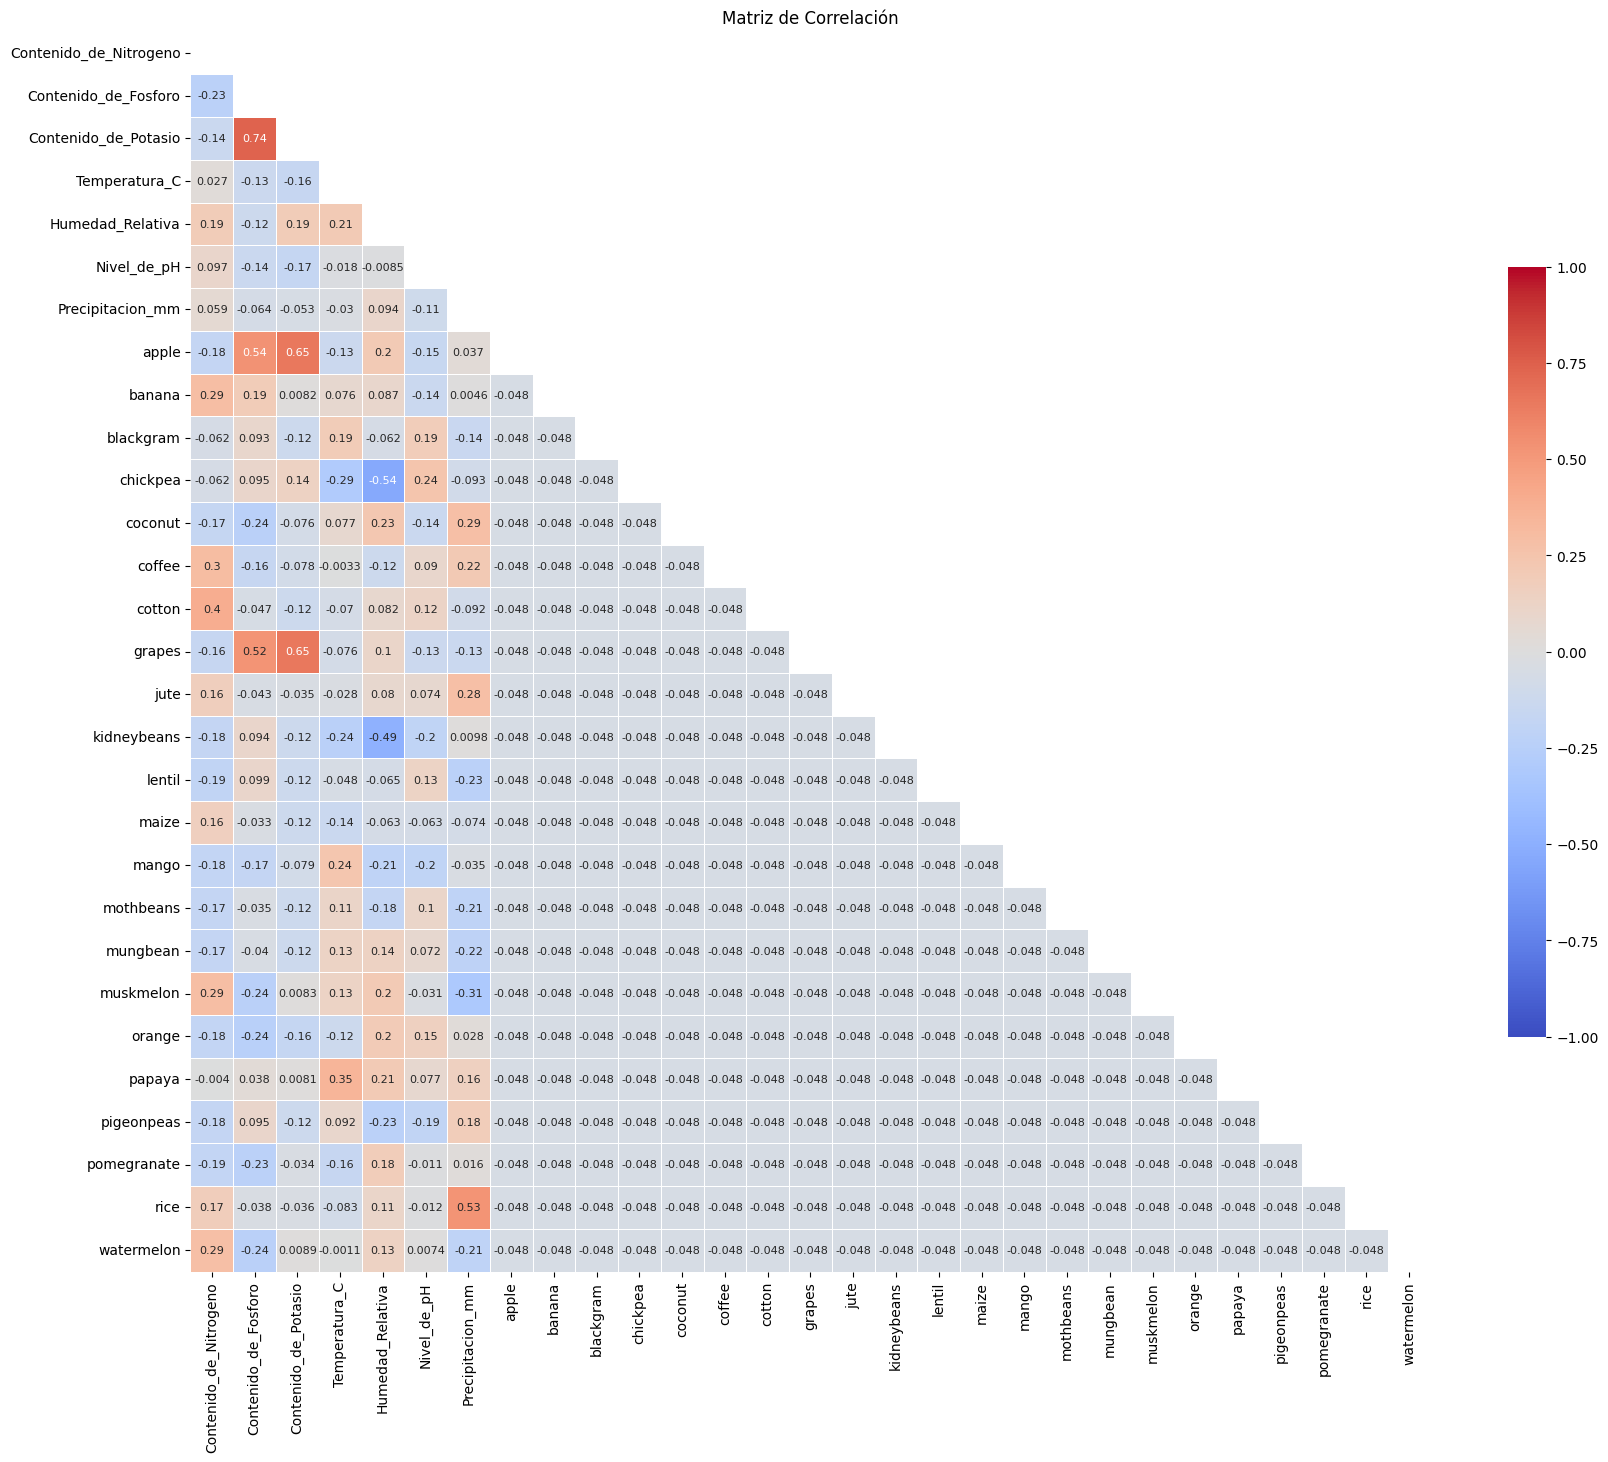

In [32]:
correlation_matrix = df_crops.corr()
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 8})
plt.title('Correlation matrix')
plt.show()

(Each soil and climate variable will be analyzed based on the type of crop; only representative crops - correlation > 0.2 for each variable/crop - will be considered)

##### ***Nitrogen Content***
- "banana" has a moderate correlation of 0.29 with "Nitrogen Content."
- "coffee" has a moderate correlation of 0.3 with "Nitrogen Content."
- "cotton" has a moderate correlation of 0.4 with "Nitrogen Content."
- "muskmelon" and "watermelon" have a moderate correlation of 0.29 with "Nitrogen Content."

##### ***Phosphorus Content***
- "grapes" has a strong correlation of 0.52 with "Phosphorus Content."
- "apples" has a strong correlation of 0.54 with "Phosphorus Content."

##### ***Potassium Content***
- "grapes" has a strong correlation of 0.65 with "Potassium Content."
- "apples" has a strong correlation of 0.65 with "Potassium Content."

##### ***Temperature_C***
- "mango" has a moderate correlation of 0.24 with "Temperature_C."
- "papaya" has a moderate correlation of 0.35 with "Temperature_C."

##### ***Relative Humidity***
- "coconut" has a moderate correlation of 0.23 with "Relative Humidity."
- "muskmelon" and "orange" have a moderate correlation of 0.2 with "Relative Humidity."
- "_papaya" has a moderate correlation of 0.21 with "Relative Humidity."
- "apple" has a moderate correlation of 0.2 with "Relative Humidity."

##### ***pH Level***
- "chickpea" has a moderate correlation of 0.24 with "pH Level."

##### ***Precipitation_mm***
- "coconut" has a moderate correlation of 0.29 with "Precipitation_mm."
- "coffee" has a moderate correlation of 0.22 with "Precipitation_mm."
- "jute" has a moderate correlation of 0.28 with "Precipitation_mm."
- "rice" has a moderate correlation of 0.53 with "Precipitation_mm."

It is important to note that correlation does not imply causation, i.e., just because two variables are correlated does not mean that one variable causes the other. Therefore, a more detailed analysis is necessary to determine the causal relationships between variables.

### Recommendation of crop according to soil and climate conditions

##### According to soil conditions:

In [33]:
crops = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
            'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
            'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
            'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

df_crops['Tipo_de_Cultivo'] = df_crops[crops].idxmax(axis=1)

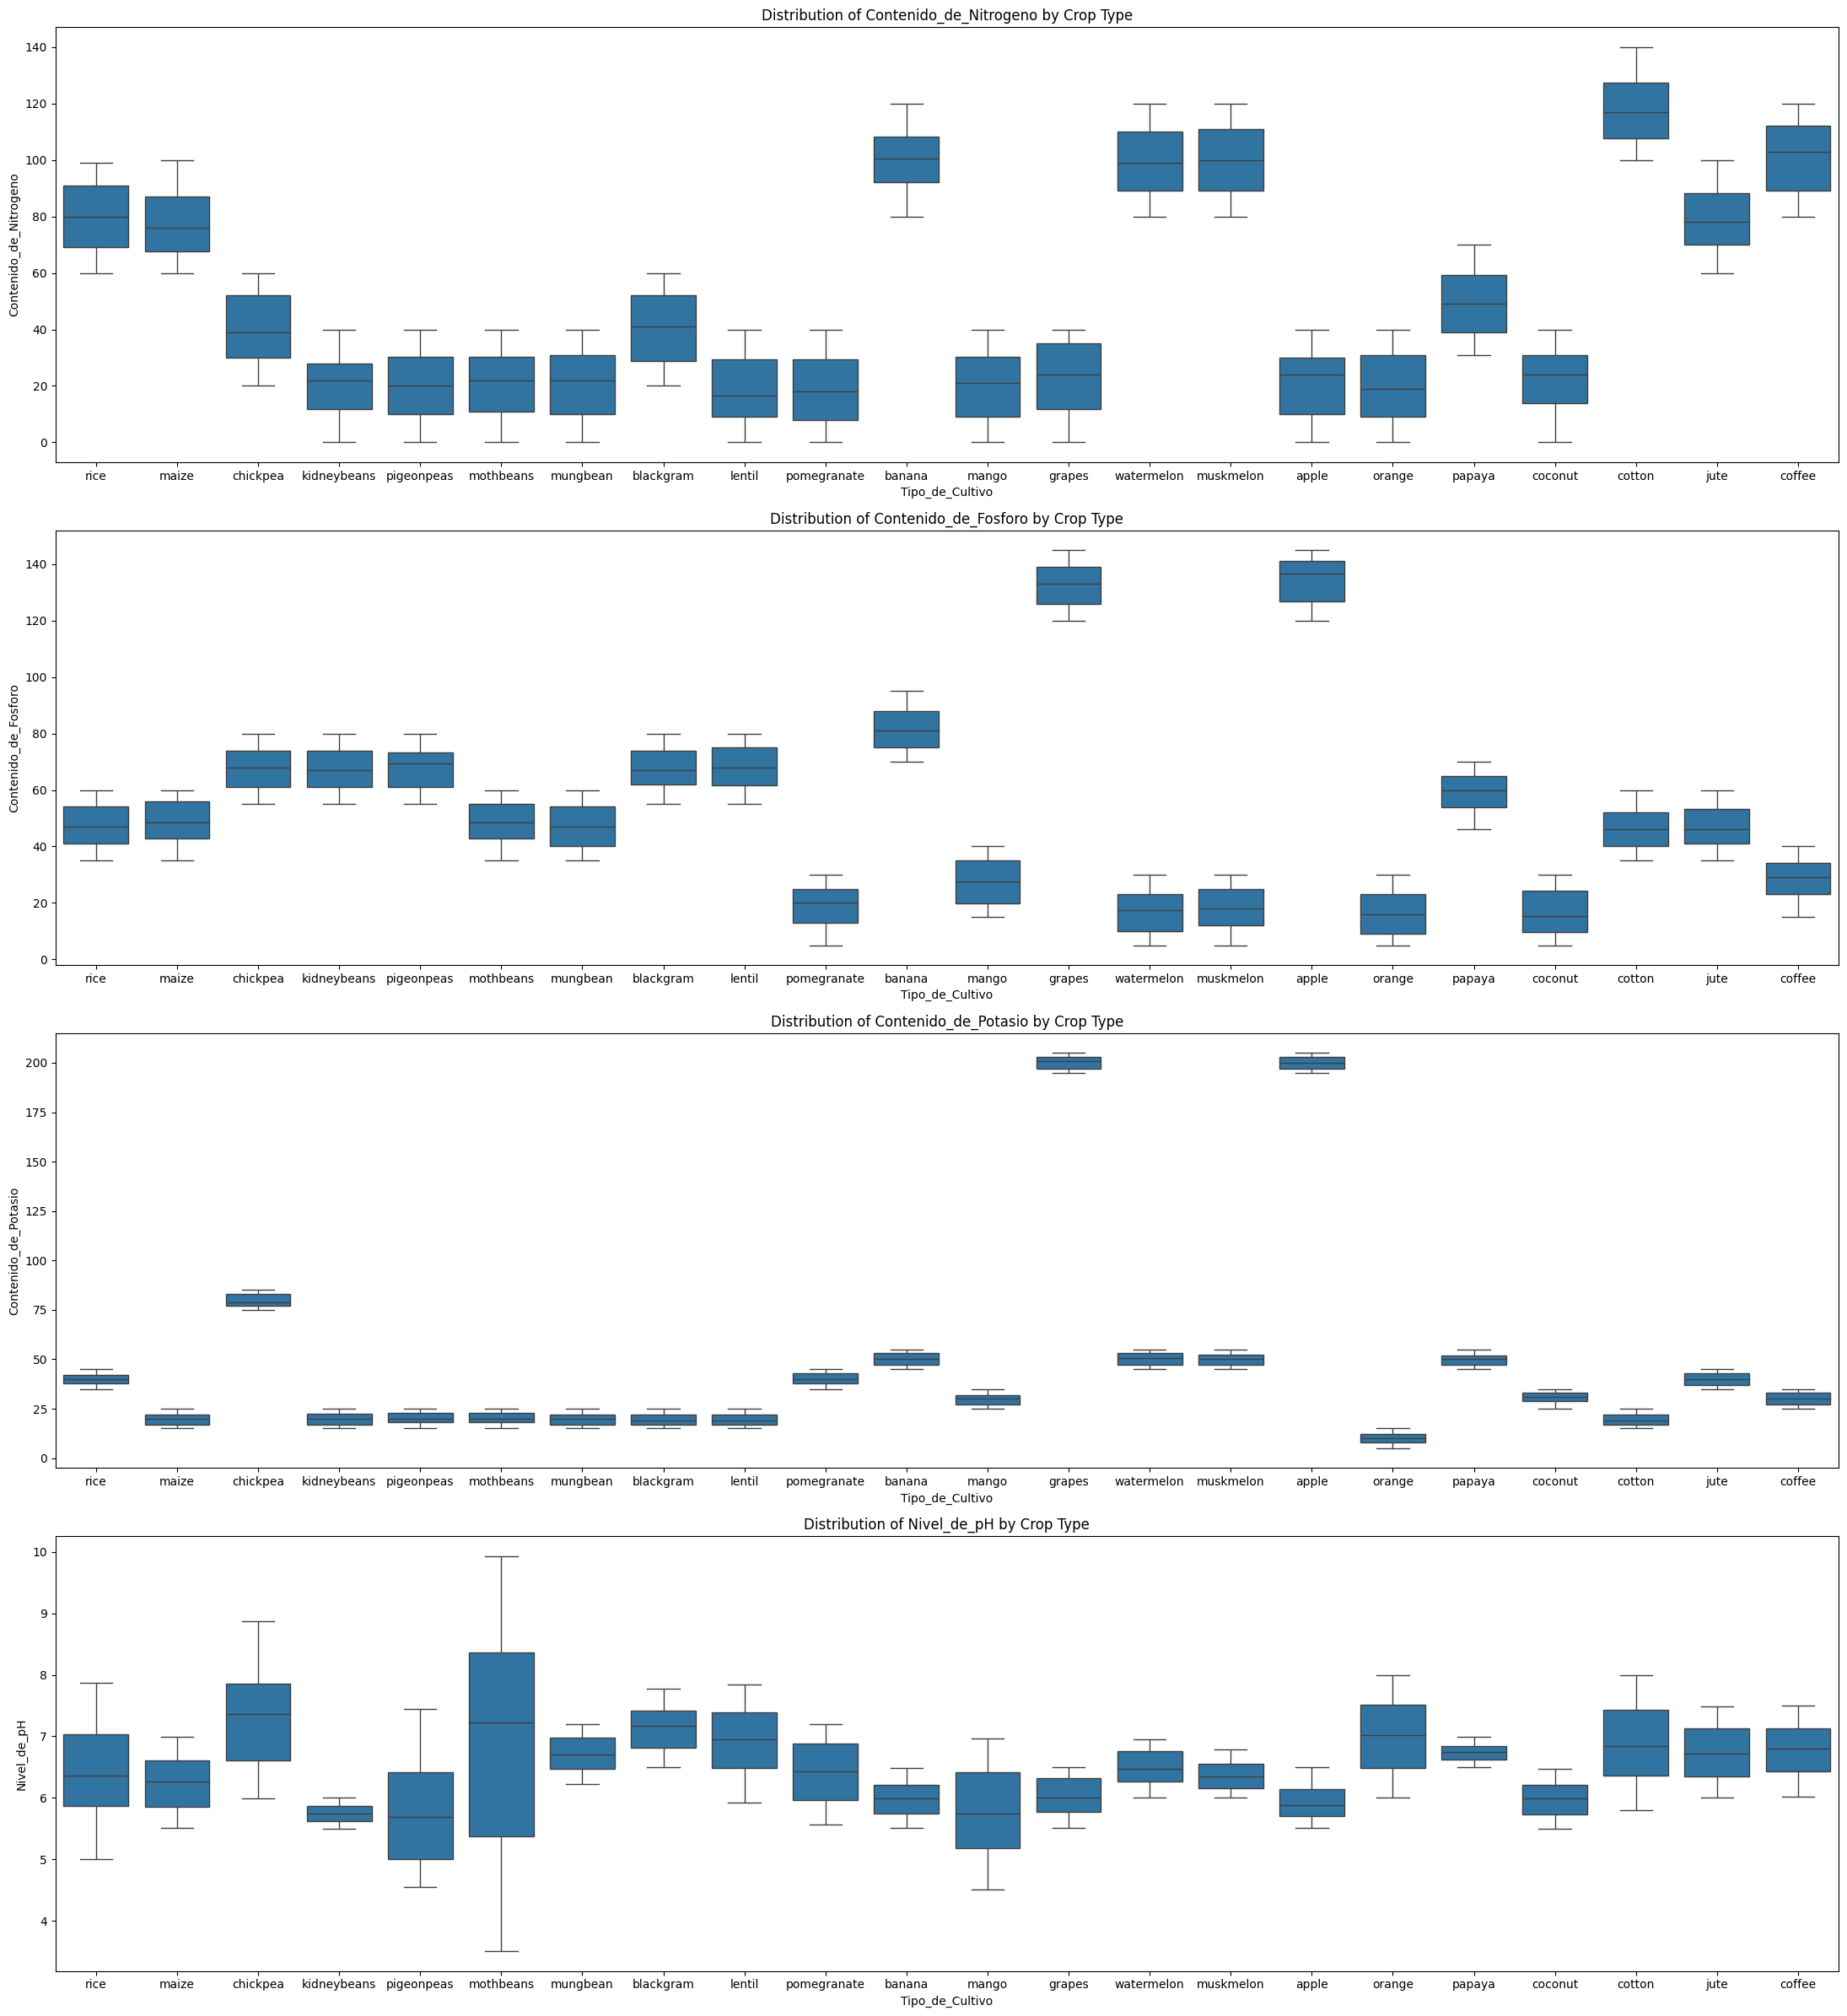

In [34]:
soil_variables = ['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Nivel_de_pH']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(soil_variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_crops)
    plt.title(f'Distribution of {variable} by Crop Type')

plt.tight_layout()
plt.show()

##### ***Variation by Nitrogen Content***
- "Cotton" is the crop type that requires the most nitrogen content. This is because cotton is a plant that requires a significant amount of nitrogen for its growth and development, as it is an essential component of proteins, necessary for the formation of plant cells.

##### ***Variation by Phosphorus Content***
- "Grapes" and "Apples" are the crop types that require the most phosphorus content. This is because phosphorus is an essential nutrient for plant growth, being a component of nucleic acids, phospholipids, and the energy molecule ATP.

##### ***Variation by Potassium Content***
- "Grapes" and "Apples" are the crop types that require the most potassium content. This is because potassium is an essential nutrient, similar to phosphorus, for plant growth, as it is a component of nucleic acids, phospholipids, and the energy molecule ATP.

##### ***Variation by pH Level***
- "Chickpea" is the crop type that requires the highest pH level. This is because chickpeas are plants that thrive in a pH between 6 and 7 for their growth and development.

## ***General Recommendation***
If a crop recommendation had to be made based on soil conditions, the following recommendation would be provided:
- Clearly, when observing the Potassium Content, it appears to be the soil variable that best classifies crop types. There are two crop types that stand out above the rest, namely "grapes" and "apples."

- When observing the Phosphorus Content, it turns out to be the second-best soil variable for classifying crop types. The same two crops, "grapes" and "apples," continue to stand out above the rest.

- If the focus is on Nitrogen Content, we can say that it exhibits a similar behavior to the previous variable, but in this case, it is of a lower quality level for distinguishing recommendations for different crop types.

- When observing the pH Level, it appears to be the soil variable that least classifies crop types. It does not allow for distinctions between them.

##### According to climate conditions:

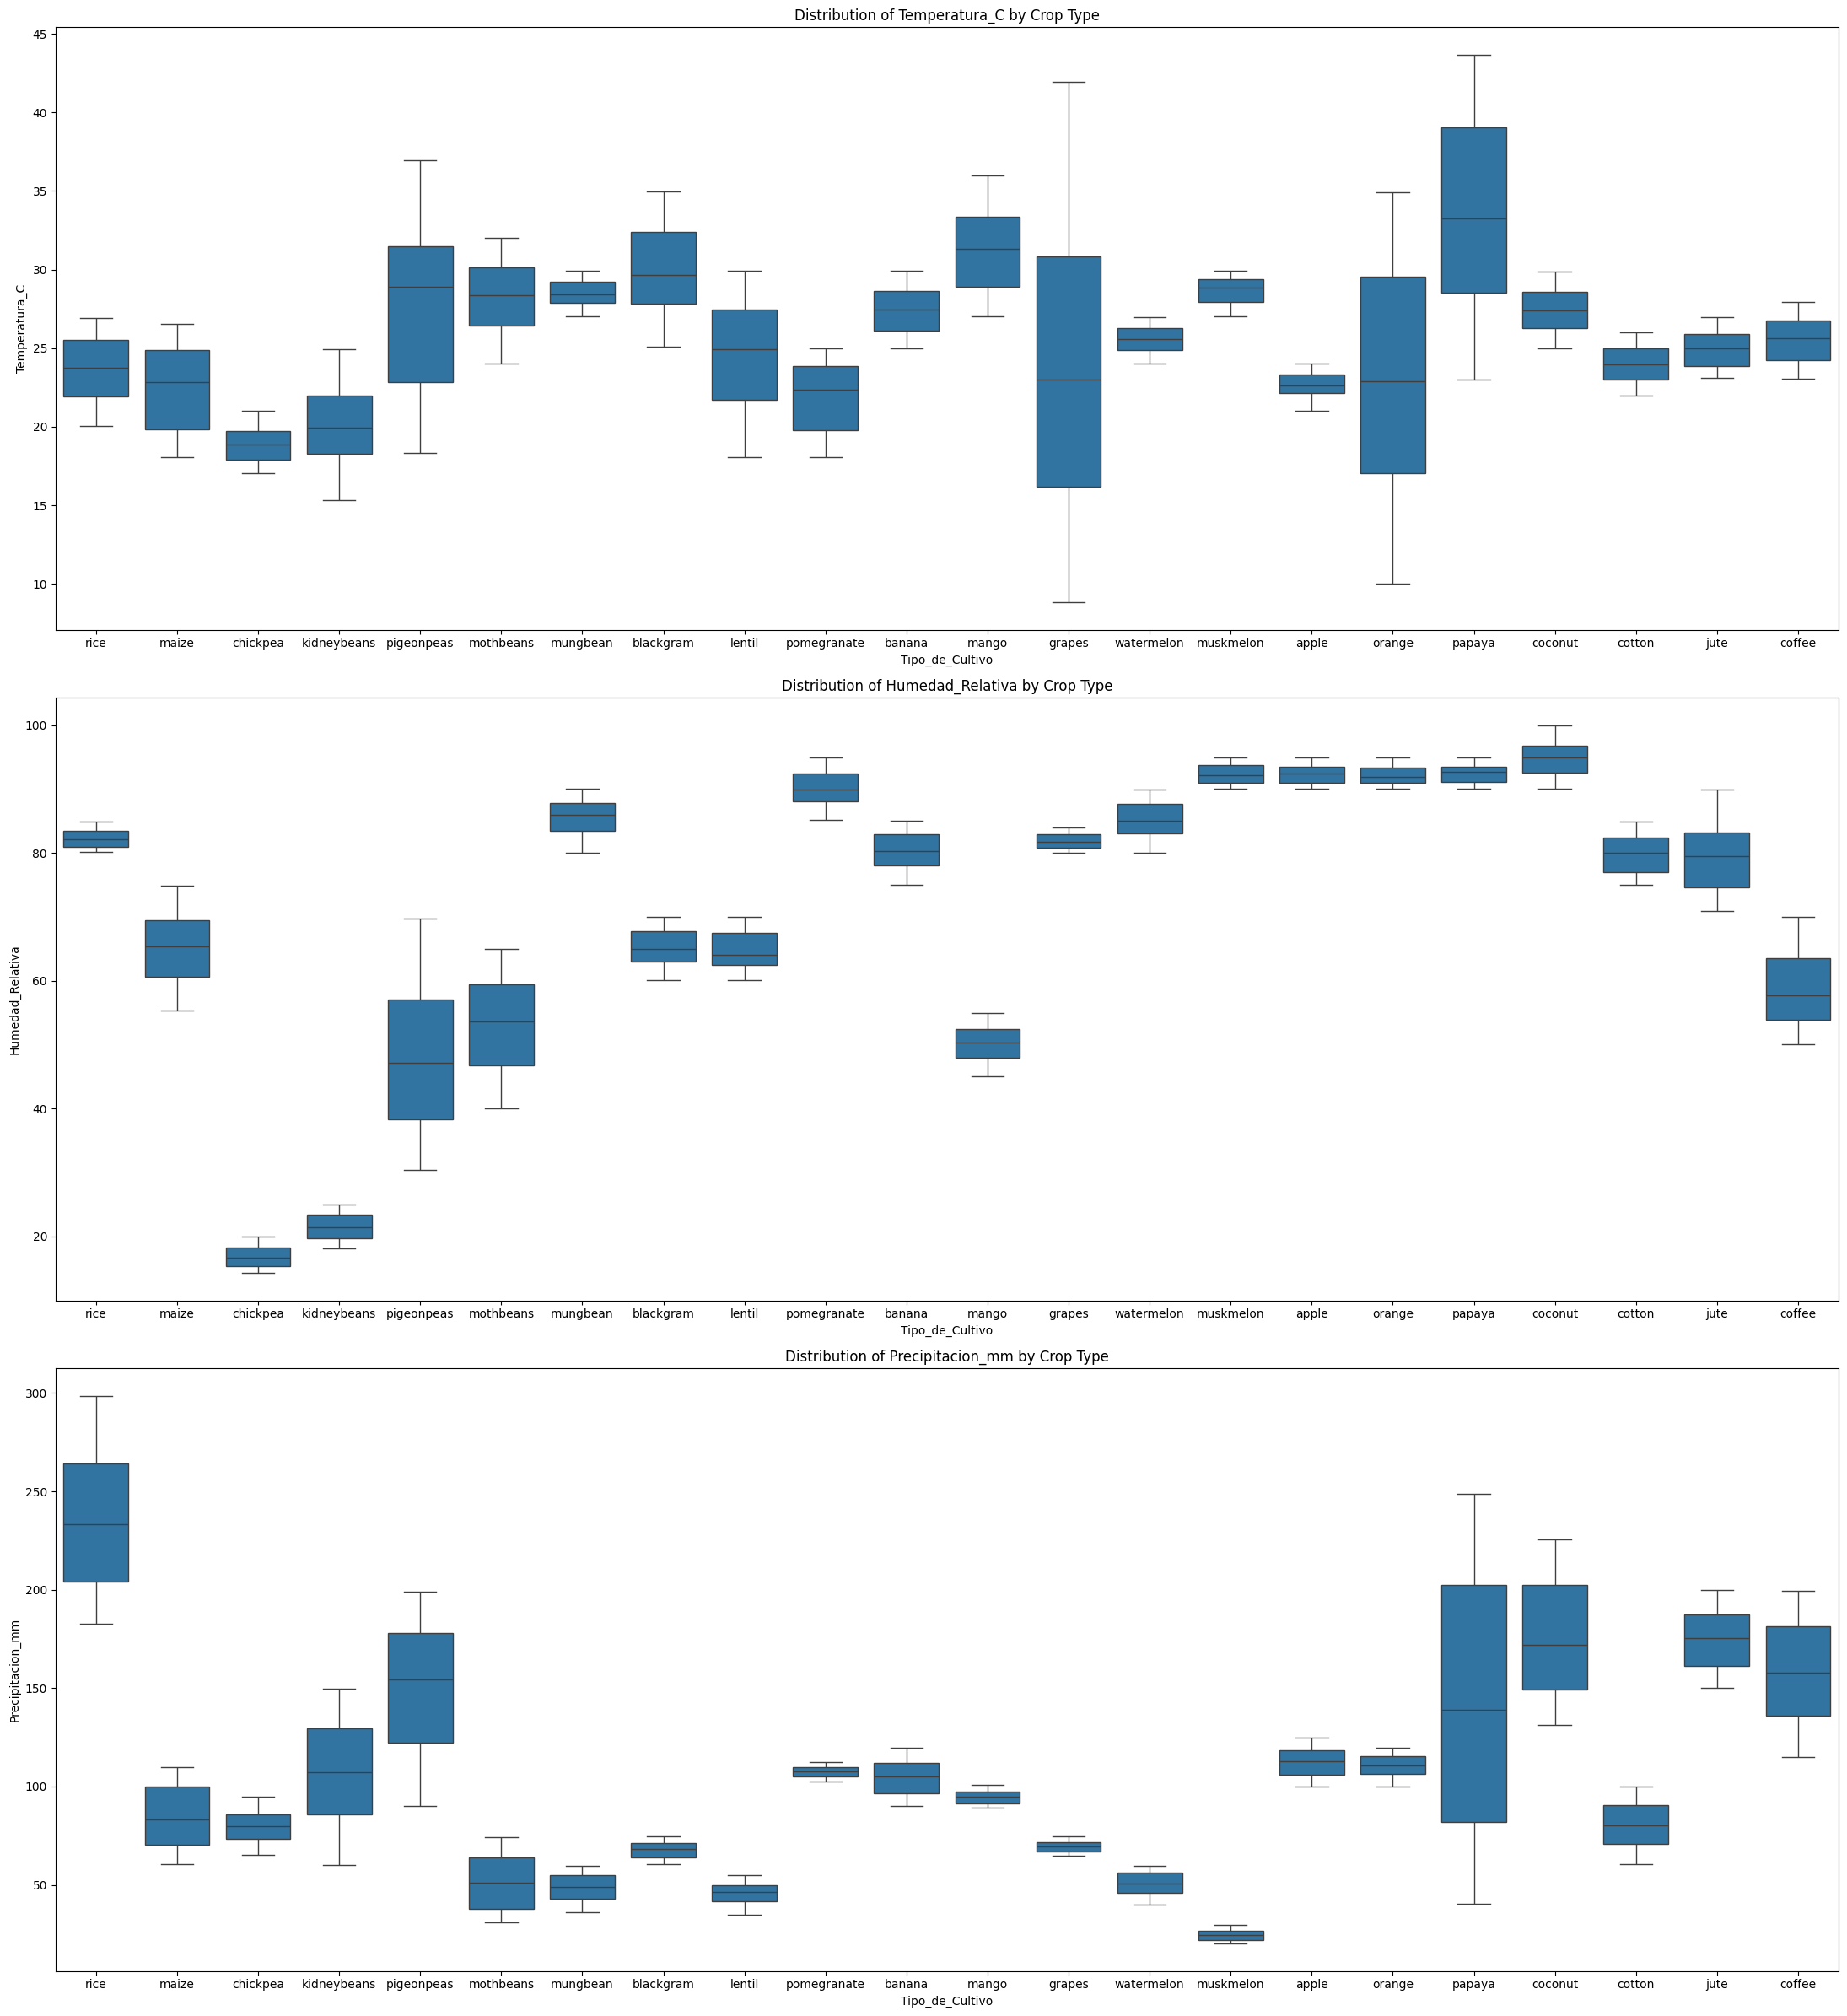

In [35]:
climate_variables = ['Temperatura_C', 'Humedad_Relativa', 'Precipitacion_mm']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(climate_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_crops)
    plt.title(f'Distribution of {variable} by Crop Type')

plt.tight_layout()
plt.show()

##### ***Variation by Temperature_C***
- "papaya" is the crop type that requires the highest temperature. This is because papaya is a tropical plant that requires warm temperatures for its growth and development.

##### ***Variation by Relative Humidity***
- "coconut" is the crop type that requires the highest relative humidity. This is because coconut is a tropical plant that requires a lot of humidity for its growth and development.

##### ***Variation by Precipitation_mm***
- "rice" is the crop type that requires the most precipitation. This is because rice is a plant that requires a lot of water for its growth and development. Additionally, rice is a crop that thrives in tropical and subtropical climates, where precipitation is abundant.

## ***General Recommendation***
If a crop recommendation were to be made based on climatic conditions, the following recommendation would be made:

- Relative humidity appears to be the climatic variable that most influences crop recommendation, as around 50%, the types of crops are divided into 2.

- Precipitation is the second variable that most influences crop recommendation, as it can be clearly seen that "rice" is the crop that requires the most precipitation. It stands out from the rest.

- Temperature_C is not a good indicator for the type of crop.

___

## ***b. Machine Learning***

### Categorical variables encoding

LabelEncoder has been used for each Crop Type since it is a categorical variable. The rest of the variables are numerical, so they do not need to be encoded.

In [36]:
from sklearn.preprocessing import LabelEncoder
df_crops_le = LabelEncoder()
df_crops_le.fit(df_crops['Tipo_de_Cultivo'])
df_crops_le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

### Logistic Regression

##### Dependent variable: Tipo de Cultivo
##### Independent variables: Contenido_de_Nitrogeno, Contenido_de_Fosforo, Contenido_de_Potasio, Temperatura_C, Humedad_Relativa, Nivel_de_pH, Precipitacion_mm

In [37]:
X = df_crops[['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa', 'Nivel_de_pH', 'Precipitacion_mm']]
y = df_crops['Tipo_de_Cultivo']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test. Esto lo hago para que el modelo no haga overfitting.

In [39]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit(method='bfgs')
stats1=result.summary()
print(stats1)

         Current function value: 0.679007
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has b

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5) 
decision_tree_model.fit(X_train, y_train)

score = cross_val_score(decision_tree_model, X, y, cv=5)
print('Cross Validation Score:', score)

dt_train_accuracy = decision_tree_model.score(X_train, y_train) 
print("Train Accuracy =", dt_train_accuracy)

dt_test_accuracy = decision_tree_model.score(X_test, y_test) 
print("Test Accuracy =", dt_test_accuracy)


Cross Validation Score: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Train Accuracy = 0.8875
Test Accuracy = 0.865909090909091


### Confusion Matrix

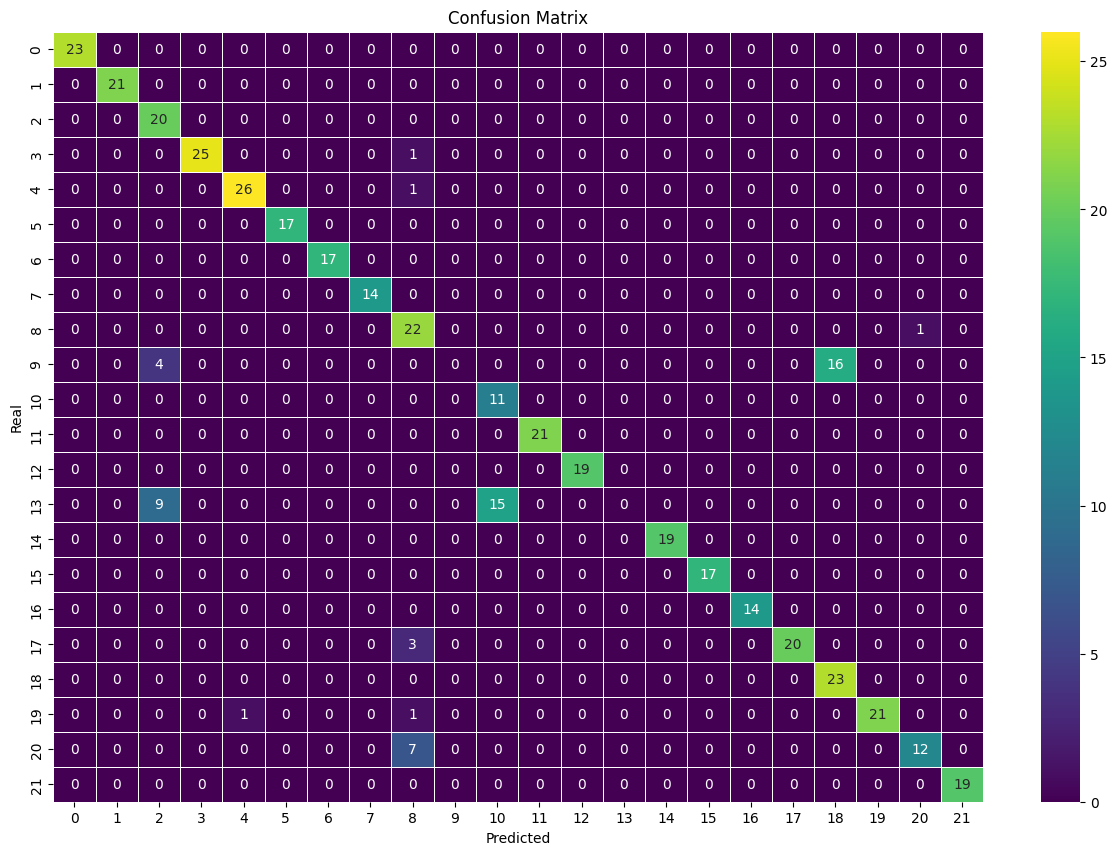

In [41]:

y_pred = decision_tree_model.predict(X_test)
y_true = y_test
cm_dt = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title('Confusion Matrix')
plt.show()

In [42]:
df_crops_le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [46]:
clases = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
          'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
          'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
          'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

positions = [clases.index(clase) for clase in df_crops_le.classes_]

for clase, position in zip(df_crops_le.classes_, positions):
    print(f'{clase}: {position}')


apple: 0
banana: 1
blackgram: 2
chickpea: 3
coconut: 4
coffee: 5
cotton: 6
grapes: 7
jute: 8
kidneybeans: 9
lentil: 10
maize: 11
mango: 12
mothbeans: 13
mungbean: 14
muskmelon: 15
orange: 16
papaya: 17
pigeonpeas: 18
pomegranate: 19
rice: 20
watermelon: 21


##### Confusion Matrix Explanation

- The confusion matrix is a table commonly used to describe the performance of a classification model.

- The diagonal of the confusion matrix represents the model's correct predictions. That is, cases where the actual crop and the predicted crop are the same.

- Off-diagonal elements represent incorrect predictions. That is, cases where the actual crop and the predicted crop are not the same.

Finally, to determine which crop is most often confused, you need to look for the row (or column) with the highest number of values off the diagonal. In this particular case, the row with the highest number of values off the diagonal is row 9 ("kidneybeans") in column 18 ("pigeonpeas"). So, this means that the prediction said they were "pigeonpeas," but they were actually "kidneybeans." Therefore, the crop that is most often confused is "kidneybeans" (16 times).

In [47]:
from sklearn.tree import export_graphviz
import graphviz

In [48]:
df_crops_le.classes_ 

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

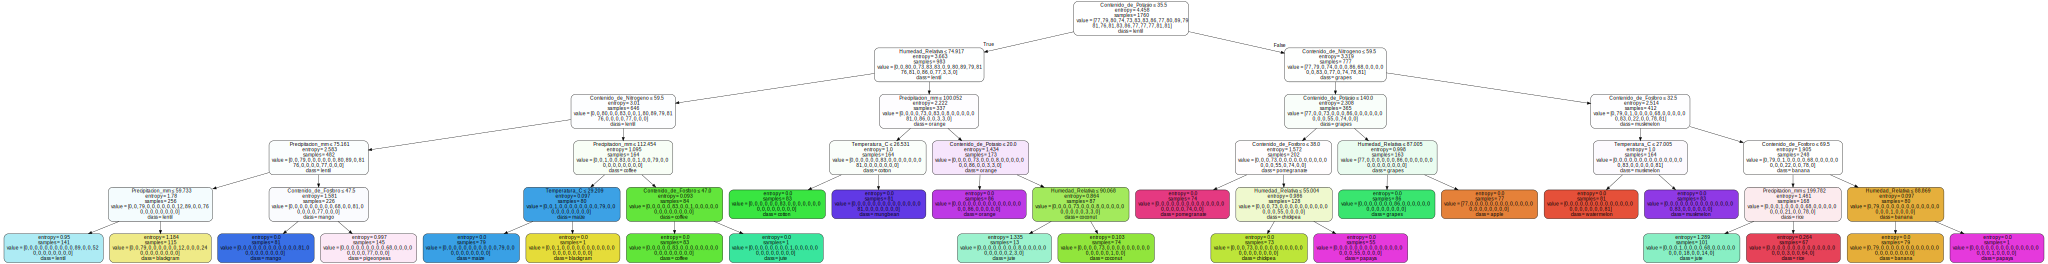

In [49]:
features = X.columns
targets = df_crops_le.classes_
data = export_graphviz(decision_tree_model, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

In [50]:
graph.format = 'png'
graph.render(filename='tree_image', directory='./', cleanup=True)

'tree_image.png'